In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# visualization
import matplotlib.pyplot as plt

# choose a ML model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import RandomizedSearchCV

# read data
int303_train = pd.read_csv("/kaggle/input/int303-big-data-analysis-2223-S1/train.csv")
int303_val= pd.read_csv("/kaggle/input/int303-big-data-analysis-2223-S1/test.csv")

# Convert the results from "Yes or No" to "1 or 0"
int303_train['Attrition']=int303_train['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)

# One-hot编码  VW > Acura > Honda
int303_dummies_train=pd.get_dummies(int303_train.loc[:,int303_train.columns!='Attrition'],drop_first=True)
int303_dummies_val=pd.get_dummies(int303_val.loc[:,int303_val.columns!='Attrition'],drop_first=True)


int303_dummies_train=int303_dummies_train.drop(columns=['EmployeeCount','StandardHours','EmployeeNumber'])
int303_dummies_val=int303_dummies_val.drop(columns=['EmployeeCount','StandardHours','EmployeeNumber'])


# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(int303_dummies_train,int303_train['Attrition'], random_state=42)
X_val=int303_dummies_val

Learning Rate: 0.001 , Score: 0.3555121865345913
Learning Rate: 0.005 , Score: 0.33875048370626176
Learning Rate: 0.01 , Score: 0.3269809501773767
Learning Rate: 0.025 , Score: 0.3154718615545444
Learning Rate: 0.03 , Score: 0.3131544089714449
Learning Rate: 0.035 , Score: 0.3124349278319432
Learning Rate: 0.04 , Score: 0.3121765930269852
Learning Rate: 0.045 , Score: 0.31060176756297625
Learning Rate: 0.05 , Score: 0.30996522022377426
Learning Rate: 0.06 , Score: 0.3089286554766317
Learning Rate: 0.07 , Score: 0.31003144202551003
Learning Rate: 0.085 , Score: 0.3104672562186941
Learning Rate: 0.1 , Score: 0.31123531676152216


Text(0, 0.5, 'MSE')

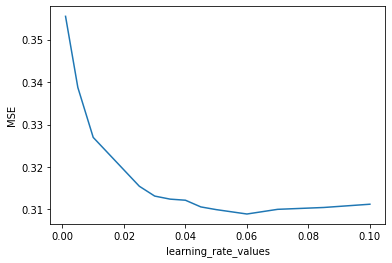

In [2]:
# variable: learning rate
learning_rate_values = [0.001, 0.005, 0.01, 0.025,0.03, 0.035, 0.04, 0.045, 0.05, 0.06, 0.07, 0.085, 0.1,]
score=[]
for value in learning_rate_values:
    gbr = GradientBoostingRegressor(max_depth=2.25, n_estimators=200, random_state=42, learning_rate=value)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    rmse = MSE(y_test, y_pred)**0.5
    score.append(rmse)
    print('Learning Rate:', value, ', Score:', rmse)
plt.plot(learning_rate_values,score)
plt.xlabel('learning_rate_values')
plt.ylabel('MSE')


Learning Rate: 0.04 , Score: 0.42486365560116324
Learning Rate: 0.04 , Score: 0.31890658605883454
Learning Rate: 0.04 , Score: 0.31890658605883454
Learning Rate: 0.04 , Score: 0.3121765930269852
Learning Rate: 0.04 , Score: 0.3121765930269852
Learning Rate: 0.04 , Score: 0.3121765930269852
Learning Rate: 0.04 , Score: 0.3145033579029989
Learning Rate: 0.04 , Score: 0.3145033579029989
Learning Rate: 0.04 , Score: 0.31999788209627333


Text(0, 0.5, 'MSE')

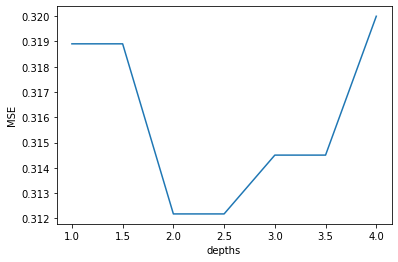

In [3]:
# variable: depth
depths = [None, 1, 1.5, 2, 2.25, 2.5, 3, 3.5, 4]
score=[]
lr=0.04
for depth in depths:
    gbr = GradientBoostingRegressor(max_depth=depth, n_estimators=200, random_state=42,learning_rate=lr)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    rmse = MSE(y_test, y_pred)**0.5
    score.append(rmse)
    print('Learning Rate:', lr, ', Score:', rmse)
plt.plot(depths,score)
plt.xlabel('depths')
plt.ylabel('MSE')

Learning Rate: 0.04 , Score: 0.3121765930269852
Learning Rate: 0.04 , Score: 0.3079141897388812
Learning Rate: 0.04 , Score: 0.30921891039714533
Learning Rate: 0.04 , Score: 0.3054992472485227
Learning Rate: 0.04 , Score: 0.3071136536678006
Learning Rate: 0.04 , Score: 0.30110322692396385
Learning Rate: 0.04 , Score: 0.31027157270182404
Learning Rate: 0.04 , Score: 0.31027157270182404
Learning Rate: 0.04 , Score: 0.31725082856979264
Learning Rate: 0.04 , Score: 0.31578450272005143


Text(0, 0.5, 'MSE')

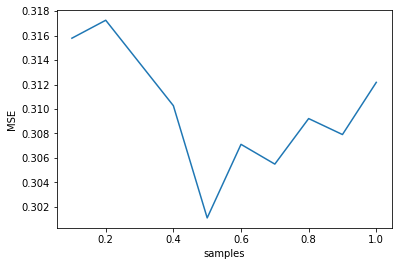

In [4]:
# variable: sample
samples = [1, 0.9, 0.8, 0.7, 0.6, 0.5,0.4,0.4,0.2,0.1]
score=[]
for sample in samples:
    gbr = GradientBoostingRegressor(max_depth=2.25, n_estimators=200, subsample=sample, random_state=42,learning_rate=lr)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    rmse = MSE(y_test, y_pred)**0.5
    score.append(rmse)
    print('Learning Rate:', lr, ', Score:', rmse)
plt.plot(samples,score)
plt.xlabel('samples')
plt.ylabel('MSE')

In [5]:
# ajust the parameters
params={'subsample':[0.8, 0.75, 0.7, 0.65, 0.6,0.55, 0.5],
                          'n_estimators':[200, 300, 400, 500, 600, 800, 1000],
                          'learning_rate':[0.04, 0.045,0.05,0.055,0.06]
                         }

gbr = GradientBoostingRegressor(max_depth=2.25, random_state=42)

# Instantiate RandomizedSearchCV as rand_reg
rand_reg = RandomizedSearchCV(gbr, params, n_iter=10, scoring='neg_mean_squared_error', 
                              cv=5, n_jobs=-1, random_state=42)

# Fit grid_reg on X_train and y_train
rand_reg.fit(X_train, y_train)

# Extract best estimator
best_model = rand_reg.best_estimator_

# Extract best params
best_params = rand_reg.best_params_

# Print best params
print("Best params:", best_params)

# Compute best score
best_score = np.sqrt(-rand_reg.best_score_)

# Print best score
print("Training score: {:.3f}".format(best_score))

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**0.5

# Print rmse_test
print('Test set score: {:.3f}'.format(rmse_test))


Best params: {'subsample': 0.5, 'n_estimators': 200, 'learning_rate': 0.04}
Training score: 0.326
Test set score: 0.301


In [6]:
# prediction
y_val_pred = best_model.predict(X_val)

int303_val['Attrition']=y_val_pred
int303_val['Attrition']=int303_val['Attrition'].apply(lambda x: 'Yes' if x==1 else 'No')

int303_val[['EmployeeNumber','Attrition']].to_csv('/kaggle/working/submission.csv', index=False)